## Content

## 01. Import libraries
## 02. Import data
## 03. Exercise 4.10 


## 01. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path

path = r'C:\Users\Frederick\Documents\07-12-2023 Instacart Basket Analysis'

## 02. Import data

In [3]:
# Import data for orders_products merged

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# Import data for states & region

region = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'states_region.csv'))

## 03. Exercise 4.10

In [5]:
# Assign missing values to suspected outliers in prices

ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [6]:
# Remove the limit on display option on columns

pd.options.display.max_columns = None

In [7]:
ords_prods_cust.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,department_id,prices,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,median_days_since_prior_order,frequency_flag,avg_price,spending_flag,Gender,STATE,Age,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,0,Soda,77,7,9.0,Regularly busy,Mid-range product,Regular days,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7,9.0,Regularly busy,Mid-range product,Slowest days,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,Soda,77,7,9.0,Regularly busy,Mid-range product,Slowest days,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7,9.0,Least busy,Mid-range product,Slowest days,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,Soda,77,7,9.0,Least busy,Mid-range product,Slowest days,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,3,married,40423,both


### Q2. Security/PII data - there are personal identifiable information in the orders_product_customer dataframe. All customer's personal details such as name and email have been removed in previous data cleaning process. 

In [8]:
# Checking unique value for State

ords_prods_cust['STATE'].unique()

array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Ohio', 'Virginia', 'Connecticut', 'Kentucky',
       'Oregon', 'South Dakota', 'Michigan', 'New Jersey', 'Arizona',
       'Maine', 'Hawaii', 'Minnesota', 'Illinois', 'Idaho', 'Kansas',
       'North Carolina', 'Vermont', 'Alaska', 'Delaware', 'Maryland',
       'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Colorado', 'Florida',
       'South Carolina', 'Rhode Island', 'Washington', 'California',
       'Mississippi', 'Texas', 'New Mexico', 'Missouri', 'Wyoming',
       'New Hampshire', 'Massachusetts', 'Pennsylvania', 'Wisconsin',
       'West Virginia', 'North Dakota', 'New York'], dtype=object)

In [9]:
# Checking total rows for states_region dataframe

region.shape

(51, 2)

In [10]:
# Rename STATE in orders_products_customer dataframe to 'state' to be consistent with state_region dataframe

ords_prods_cust.rename(columns = {'STATE' : 'State'}, inplace = True)

In [11]:
# Create subset from orders_products_customer on state and spending_flag

df_states = ords_prods_cust[['State', 'spending_flag']]

In [12]:
# Checking total rows for subset

df_states.shape

(32404859, 2)

In [13]:
# Merge states_region dataframe to states subset

df_states2 = df_states.merge(region, on = 'State', indicator = True)

In [14]:
# Checking output on the merge

df_states2.head()

,State,spending_flag,Region,_merge
0,Alabama,Low spender,South,both
1,Alabama,Low spender,South,both
2,Alabama,Low spender,South,both
3,Alabama,Low spender,South,both
4,Alabama,Low spender,South,both


In [15]:
# Checking total count in merged dataframe

df_states2.shape

(32404859, 4)

In [16]:
# Creating crosstab on region and spending_flag

crosstab = pd.crosstab(df_states2['spending_flag'], df_states2['Region'], dropna = False)

In [17]:
crosstab.to_clipboard()

In [18]:
crosstab.head()

Region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


### Q3. There appears to be a difference in spending habits between the different U.S. regions. Namely, South region had the highest number of high spender, but also the highest number of low spender. In general, South region had the most high spender, followed by West, Midwest and Northeast. This trend is also consistent in low spender. 

In [19]:
# Create exclusion flag for customers with less than 5 orders

ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'Include'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6356\2099580776.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Include' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'Include'


In [20]:
# Create exclusion flag for customers will 5 or more orders

ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [21]:
# Checking output on exclusion flag

ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    30964564
Exclude     1440295
Name: count, dtype: int64

In [22]:
# Create subset to include only customers who have 5 orders or more

ords_prods_cust_inc = ords_prods_cust[ords_prods_cust['exclusion_flag']=='Include']

In [23]:
# Checking output on subset

ords_prods_cust_inc['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    30964564
Name: count, dtype: int64

In [24]:
# Exporting subset with only customers that have 5 orders or more

ords_prods_cust_inc.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_include.pkl'))

### Q4. The sample that contains customers with 5 orders or more is exported - file name orders_products_customers_include.pkl

In [25]:
# Checking unique value for number of dependants

ords_prods_cust_inc['n_dependants'].unique()

array([3, 0, 1, 2], dtype=int64)

In [26]:
# Checking unique value for marital_status

ords_prods_cust_inc['marital_status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [27]:
# Creating crosstab on marital_status and n_dependants

crosstab2 = pd.crosstab(ords_prods_cust_inc['marital_status'], ords_prods_cust_inc['n_dependants'], dropna = False)

In [28]:
crosstab2

n_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


### From the above table, we can see that people with no dependant are either single or divorced/widowed. On the other hand, people who have dependant are mostly married, and some are living with parents and siblings (possibility of sole parents). 

In [29]:
# Creating crosstab on marital_status and age

crosstab3 = pd.crosstab(ords_prods_cust_inc['Age'], ords_prods_cust_inc['marital_status'], dropna = False)

In [30]:
crosstab3

marital_status,divorced/widowed,living with parents and siblings,married,single
Age,,,,
18,0,359202,0,119255
19,0,390496,0,105581
20,0,360065,0,120129
21,0,371409,0,117707
22,0,0,362016,128795
...,...,...,...,...
77,114146,0,363853,0
78,122861,0,348258,0
79,119056,0,389281,0


### Q5. From the second crosstab table, we can see that people who live with parents and siblings are aged 18 to 21 and people who are married are aged from 22 to 81. Coupled with the first able, we can group the customer and create profiles as people without dependant (single, divorced/widowed), people with dependant (young parents at home - those between 18 - 21 years old, young parents between 22 - 39 years old, mature parents between 40 - 59 years old and older parents above 60 years old).

In [31]:
crosstab2.to_clipboard()

In [32]:
crosstab3.to_clipboard()

In [33]:
# Remove the limit on display option on rows

pd.options.display.max_rows = None

In [34]:
# Creating customer profile flag for single

ords_prods_cust_inc.loc[(ords_prods_cust_inc['marital_status'] == 'single') & (ords_prods_cust_inc['n_dependants'] == 0), 'profile'] = 'Single'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6356\3973595253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_inc.loc[(ords_prods_cust_inc['marital_status'] == 'single') & (ords_prods_cust_inc['n_dependants'] == 0), 'profile'] = 'Single'
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6356\3973595253.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Single' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_cust_inc.loc[(ords_prods_cust_inc['marital_status'] == 'single') & (ords_prods_cust_inc['n_dependants'] == 0), 'profile'] = 'Single'


In [35]:
# Creating customer profile flag for divorced/widowed

ords_prods_cust_inc.loc[(ords_prods_cust_inc['marital_status'] == 'divorced/widowed') & (ords_prods_cust_inc['n_dependants'] == 0), 'profile'] = 'Divorced/Widowed'

In [36]:
# Creating customer profile flag for young parents who are staying at home

ords_prods_cust_inc.loc[(ords_prods_cust_inc['n_dependants'] > 0) & (ords_prods_cust_inc['Age'] >= 18) & (ords_prods_cust_inc['Age'] < 22), 'profile'] = 'Young Parents Home'

In [37]:
# Creating customer profile flag for young parents

ords_prods_cust_inc.loc[(ords_prods_cust_inc['n_dependants'] > 0) & (ords_prods_cust_inc['Age'] >= 22) & (ords_prods_cust_inc['Age'] < 40), 'profile'] = 'Young Parents'

In [38]:
# Creating customer profile flag for Mature parents

ords_prods_cust_inc.loc[(ords_prods_cust_inc['n_dependants'] > 0) & (ords_prods_cust_inc['Age'] >= 40) & (ords_prods_cust_inc['Age'] < 60), 'profile'] = 'Mature Parents'

In [39]:
# Creating customer profile flag for Older parents

ords_prods_cust_inc.loc[(ords_prods_cust_inc['n_dependants'] > 0) & (ords_prods_cust_inc['Age'] >= 60), 'profile'] = 'Older Parents'

In [40]:
# Creating income flag for Low income

ords_prods_cust_inc.loc[(ords_prods_cust_inc['income'] < 52000), 'income_flag'] = 'Lower class'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_6356\2224565551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_inc.loc[(ords_prods_cust_inc['income'] < 52000), 'income_flag'] = 'Lower class'
C:\Users\Frederick\AppData\Local\Temp\ipykernel_6356\2224565551.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Lower class' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_cust_inc.loc[(ords_prods_cust_inc['income'] < 52000), 'income_flag'] = 'Lower class'


In [41]:
# Creating income flag for Medium income

ords_prods_cust_inc.loc[(ords_prods_cust_inc['income'] >= 52000) & (ords_prods_cust_inc['income'] < 156001), 'income_flag'] = 'Middle class'

In [42]:
# Creating income flag for High income

ords_prods_cust_inc.loc[(ords_prods_cust_inc['income'] >= 156001), 'income_flag'] = 'Upper classe'

In [43]:
# Checking output on subset on customer profile

ords_prods_cust_inc['profile'].value_counts(dropna = False)

profile
Older Parents         7929233
Mature Parents        7291115
Young Parents         6523363
Single                5094410
Divorced/Widowed      2645271
Young Parents Home    1481172
Name: count, dtype: int64

In [44]:
# Checking output on subset on income flag

ords_prods_cust_inc['income_flag'].value_counts(dropna = False)

income_flag
Middle class    24490126
Lower class      3632792
Upper classe     2841646
Name: count, dtype: int64

In [45]:
# Exporting subset with updated customer profile & income flag

ords_prods_cust_inc.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_final.pkl'))

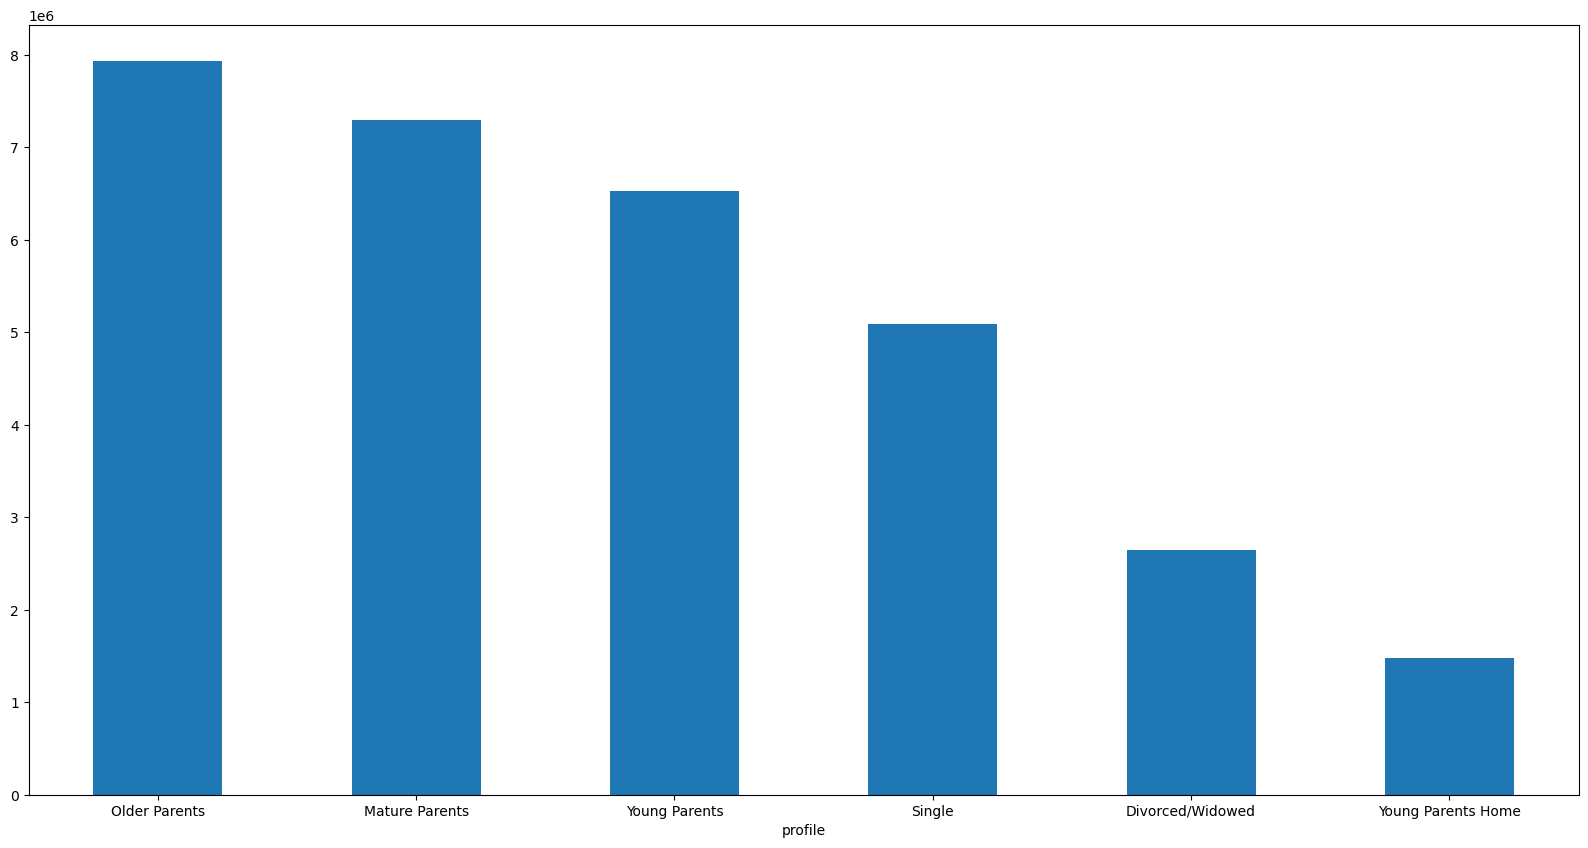

In [46]:
# Plot bar chart on custoemr profile

bar = ords_prods_cust_inc['profile'].value_counts().plot.bar(rot=0, figsize=(20,10))

In [47]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile.png'))

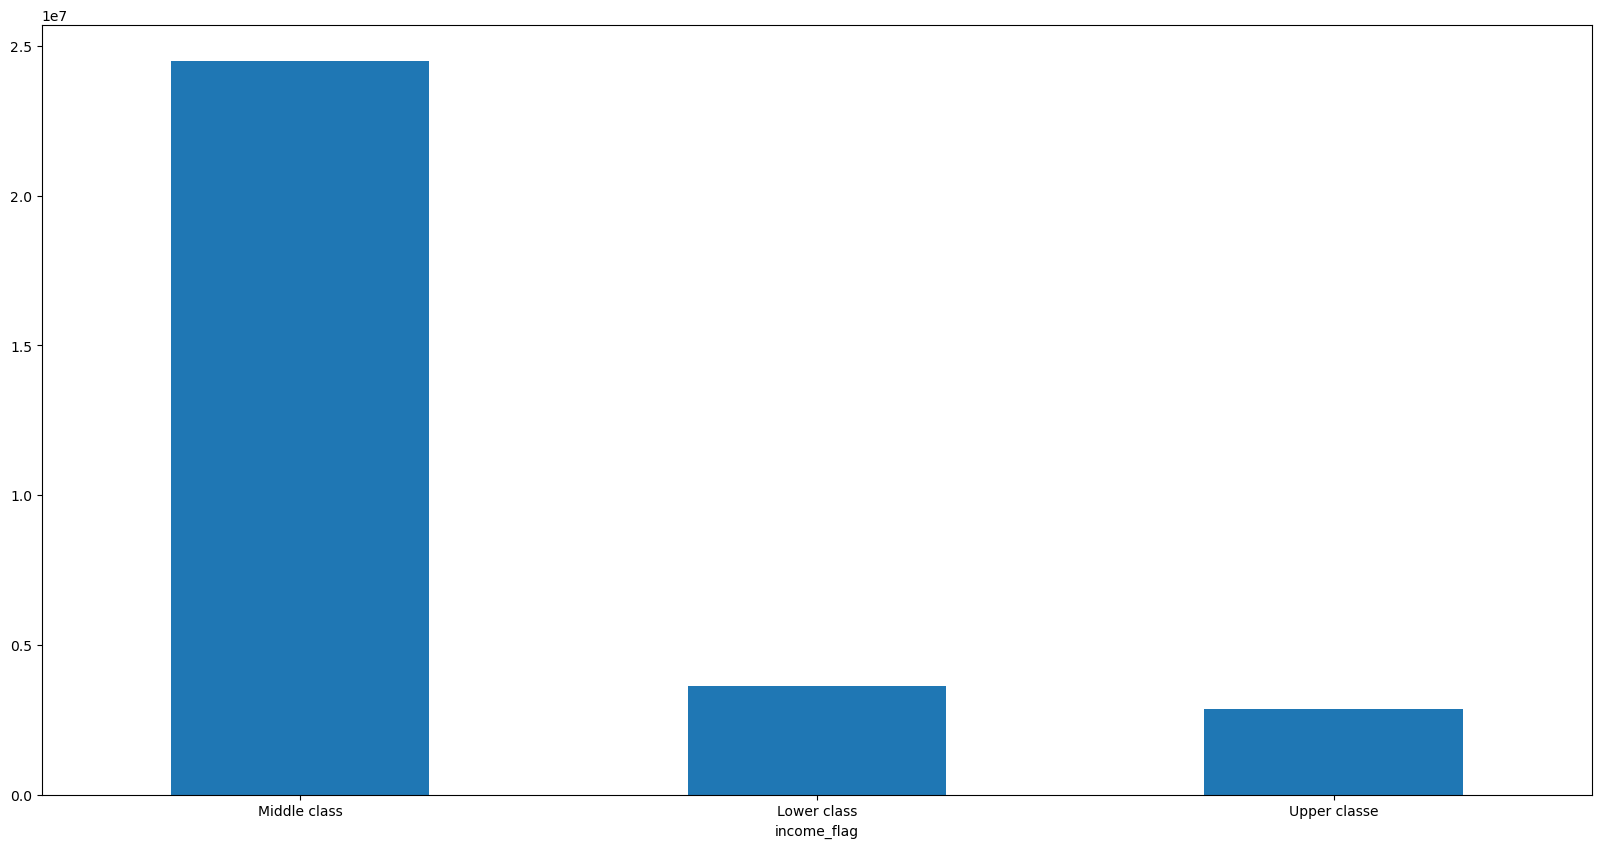

In [48]:
# Plot bar chart on income flag

bar2 = ords_prods_cust_inc['income_flag'].value_counts().plot.bar(rot=0, figsize=(20,10))

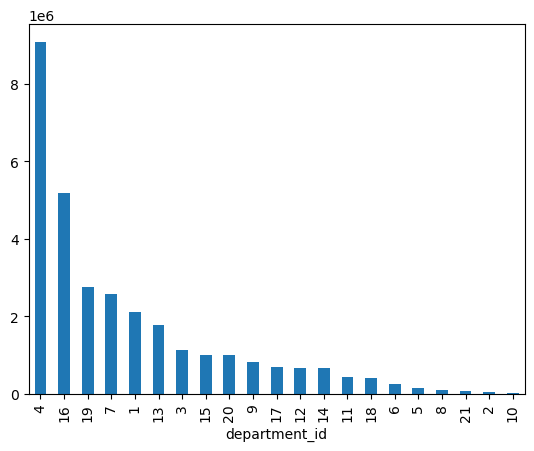

In [49]:
# Plot bar chart on department_id

bar3 = ords_prods_cust_inc['department_id'].value_counts().plot.bar()

In [50]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_flag.png'))

In [51]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments.png'))

### Q6.The above three bar charts shows the distribution on the customer profiles (based on age, family status and number of dependants), income level and department ID. 

In [52]:
# Basic stats for customer profile on expenditure

ords_prods_cust_inc.groupby('profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
profile                                
Divorced/Widowed    7.801014  1.0  25.0
Mature Parents      7.792658  1.0  25.0
Older Parents       7.793589  1.0  25.0
Single              7.783597  1.0  25.0
Young Parents       7.783595  1.0  25.0
Young Parents Home  7.800604  1.0  25.0

In [53]:
# Basic stats for customer profile on frequency of orders

ords_prods_cust_inc.groupby('profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                         mean min max
profile                              
Divorced/Widowed    34.710676   5  99
Mature Parents      34.209082   5  99
Older Parents       34.237494   5  99
Single              34.657749   5  99
Young Parents       34.502705   5  99
Young Parents Home  34.853070   5  99

In [54]:
# Basic stats for income flag on expenditure

ords_prods_cust_inc.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_flag                      
Lower class   6.751992  1.0  25.0
Middle class  7.927603  1.0  25.0
Upper classe  7.937780  1.0  25.0

In [55]:
# Basic stats for customer profile on frequency of orders

ords_prods_cust_inc.groupby('income_flag').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                   mean min max
income_flag                    
Lower class   32.486208   5  99
Middle class  34.638510   5  99
Upper classe  35.070978   5  99

In [56]:
# Basic stats for department_id on expenditure

ords_prods_cust_inc.groupby('department_id').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
department_id                      
1               7.733725  1.0  15.0
2               6.961995  1.1  15.0
3               7.857482  1.0  15.0
4               7.980348  1.0  15.0
5               8.150699  1.0  15.0
6               7.678797  1.0  15.0
7               7.682556  1.0  15.0
8               7.887489  1.0  15.0
9               7.349370  1.0  15.0
10              8.346919  1.4  14.1
11              7.998744  1.0  15.0
12             16.300034  8.0  25.0
13              8.014482  1.0  20.0
14              8.031647  1.0  14.9
15              7.546660  1.0  15.0
16              8.336372  1.0  15.0
17              7.379951  1.0  15.0
18              7.634399  1.0  15.0
19              4.275555  1.6   7.0
20              7.783347  1.0  15.0
21              8.660655  1.0  15.0

In [57]:
# Basic stats for department_id on frequency of orders

ords_prods_cust_inc.groupby('department_id').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                    mean min max
department_id                   
1              31.763479   5  99
2              33.458661   5  99
3              34.805343   5  99
4              35.366390   5  99
5              31.642598   5  99
6              33.043162   5  99
7              34.517376   5  99
8              30.903740   5  99
9              32.137168   5  99
10             39.044603   5  99
11             32.009477   5  99
12             32.519054   5  99
13             33.507631   5  99
14             34.216348   5  99
15             31.809499   5  99
16             35.640435   5  99
17             31.391197   5  99
18             39.003575   5  99
19             34.737297   5  99
20             33.760513   5  99
21             31.167552   5  99

### Q7. The above tables show the basic statistics - mean, max and min value on prices and maxinum number of orders (i.e. frequency of items being ordered) against customer profiles, income level and department ID. 

In [58]:
# Create subset from orders_products_customer on state and customer profile flags

df_states3 = ords_prods_cust_inc[['State', 'spending_flag', 'profile', 'income_flag', 'department_id', 'prices', 'max_order']]

In [59]:
# Merge states_region dataframe to new subset on customer profiles

df_states4 = df_states3.merge(region, on = 'State', indicator = True)

In [60]:
# Create group by customer profile and region on average expenditure

df_states4.groupby(['profile', 'Region']).agg({'prices' : ['mean']})

prices
                                  mean
profile            Region             
Divorced/Widowed   Midwest    7.785051
                   Northeast  7.816564
                   South      7.806102
                   West       7.797954
Mature Parents     Midwest    7.794626
                   Northeast  7.777958
                   South      7.799804
                   West       7.791975
Older Parents      Midwest    7.790476
                   Northeast  7.791705
                   South      7.793693
                   West       7.797553
Single             Midwest    7.798933
                   Northeast  7.768657
                   South      7.788979
                   West       7.772456
Young Parents      Midwest    7.783914
                   Northeast  7.773949
                   South      7.786394
                   West       7.786244
Young Parents Home Midwest    7.816888
                   Northeast  7.754427
                   South      7.806200
                   West       7.809550

Text(0, 0.5, 'Average Price')

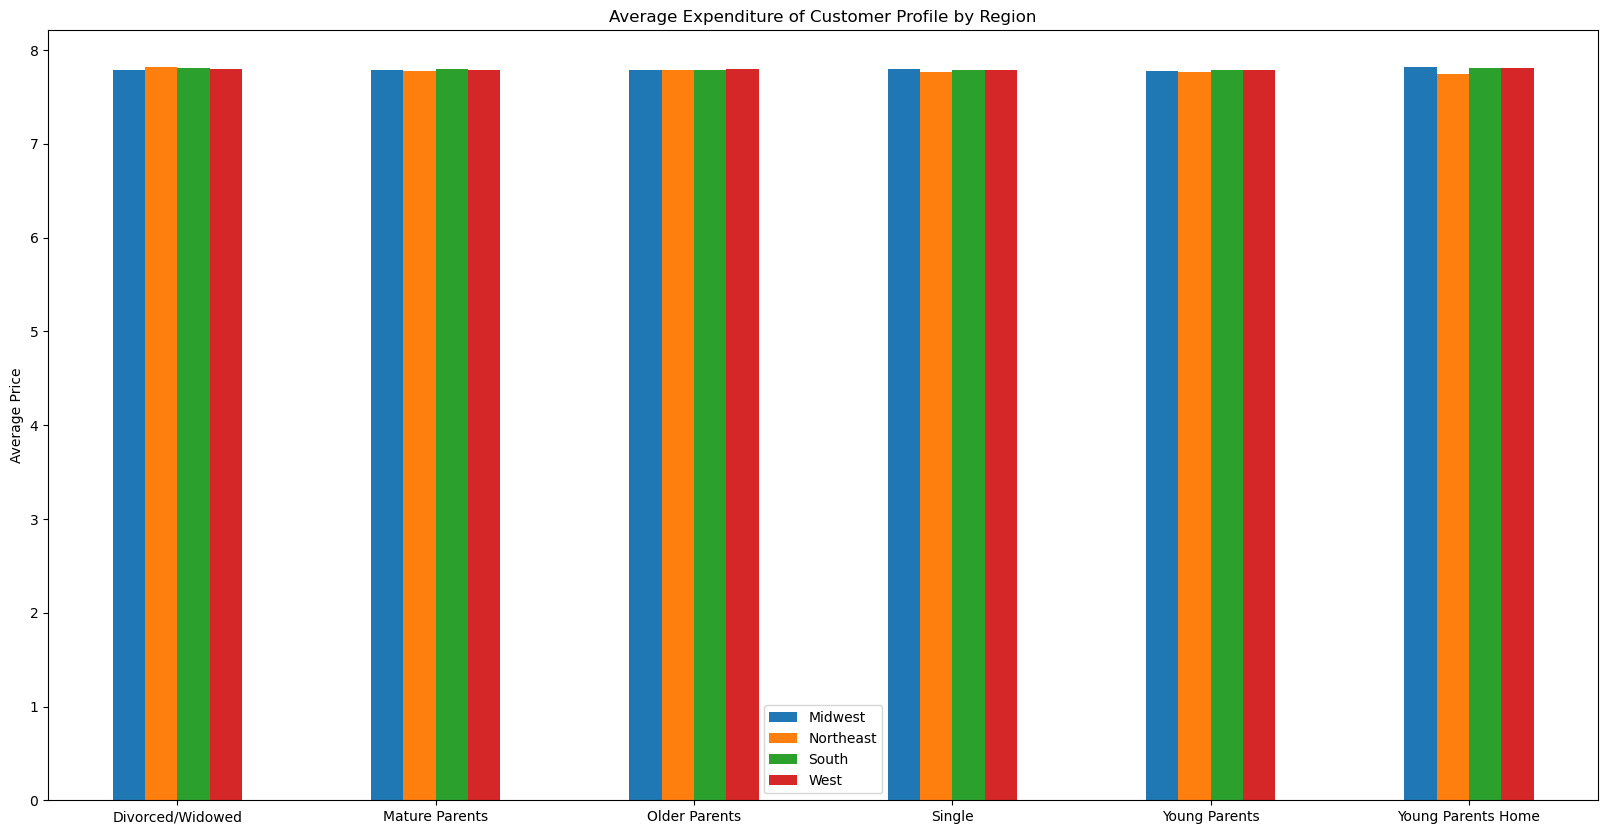

In [80]:
# Plot bar chart on profile and region

Midwest = [7.79, 7.79, 7.79, 7.80, 7.78, 7.82]
Northeast = [7.82, 7.78, 7.79, 7.77, 7.77, 7.75]
South = [7.81, 7.80, 7.79, 7.79, 7.79, 7.81]
West = [7.80, 7.79, 7.80, 7.79, 7.79, 7.81]
index = ['Divorced/Widowed', 'Mature Parents', 'Older Parents', 'Single', 'Young Parents', 'Young Parents Home']
df = pd.DataFrame({'Midwest': Midwest,
                   'Northeast': Northeast,
                   'South': South,
                   'West': West}, index=index)
ax = df.plot.bar(rot=0, figsize=(20,10))
ax.set_title("Average Expenditure of Customer Profile by Region")
ax.set_ylabel("Average Price")

In [81]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_region.png'))

In [63]:
# Create group by customer profile and region on average order

df_states4.groupby(['profile', 'Region']).agg({'max_order' : ['mean']})

max_order
                                   mean
profile            Region              
Divorced/Widowed   Midwest    34.666063
                   Northeast  35.207544
                   South      34.813625
                   West       34.263249
Mature Parents     Midwest    33.789295
                   Northeast  35.114916
                   South      33.609095
                   West       34.730676
Older Parents      Midwest    33.336606
                   Northeast  34.345516
                   South      34.457479
                   West       34.689418
Single             Midwest    34.444122
                   Northeast  33.631403
                   South      34.688920
                   West       35.500883
Young Parents      Midwest    34.125864
                   Northeast  34.421808
                   South      35.019900
                   West       34.218946
Young Parents Home Midwest    33.842070
                   Northeast  36.448099
                   South      35.121939
                   West       34.337605

### There doesn't seem to be much difference in terms of average number of orders across the regions for the customer profile, so no chart is plotted. 

In [64]:
# Create group by customer profile and department_id on average expenditure

df_states4.groupby(['profile', 'income_flag']).agg({'prices' : ['mean']})

prices
                                     mean
profile            income_flag           
Divorced/Widowed   Lower class   6.519730
                   Middle class  7.917467
                   Upper classe  7.931249
Mature Parents     Lower class   6.538521
                   Middle class  7.916270
                   Upper classe  7.942590
Older Parents      Lower class   6.506368
                   Middle class  7.915359
                   Upper classe  7.948599
Single             Lower class   6.829426
                   Middle class  7.933337
                   Upper classe  7.916914
Young Parents      Lower class   6.989667
                   Middle class  7.945872
                   Upper classe  7.816143
Young Parents Home Lower class   6.983663
                   Middle class  7.959169
                   Upper classe  7.956631

Text(0, 0.5, 'Average Price')

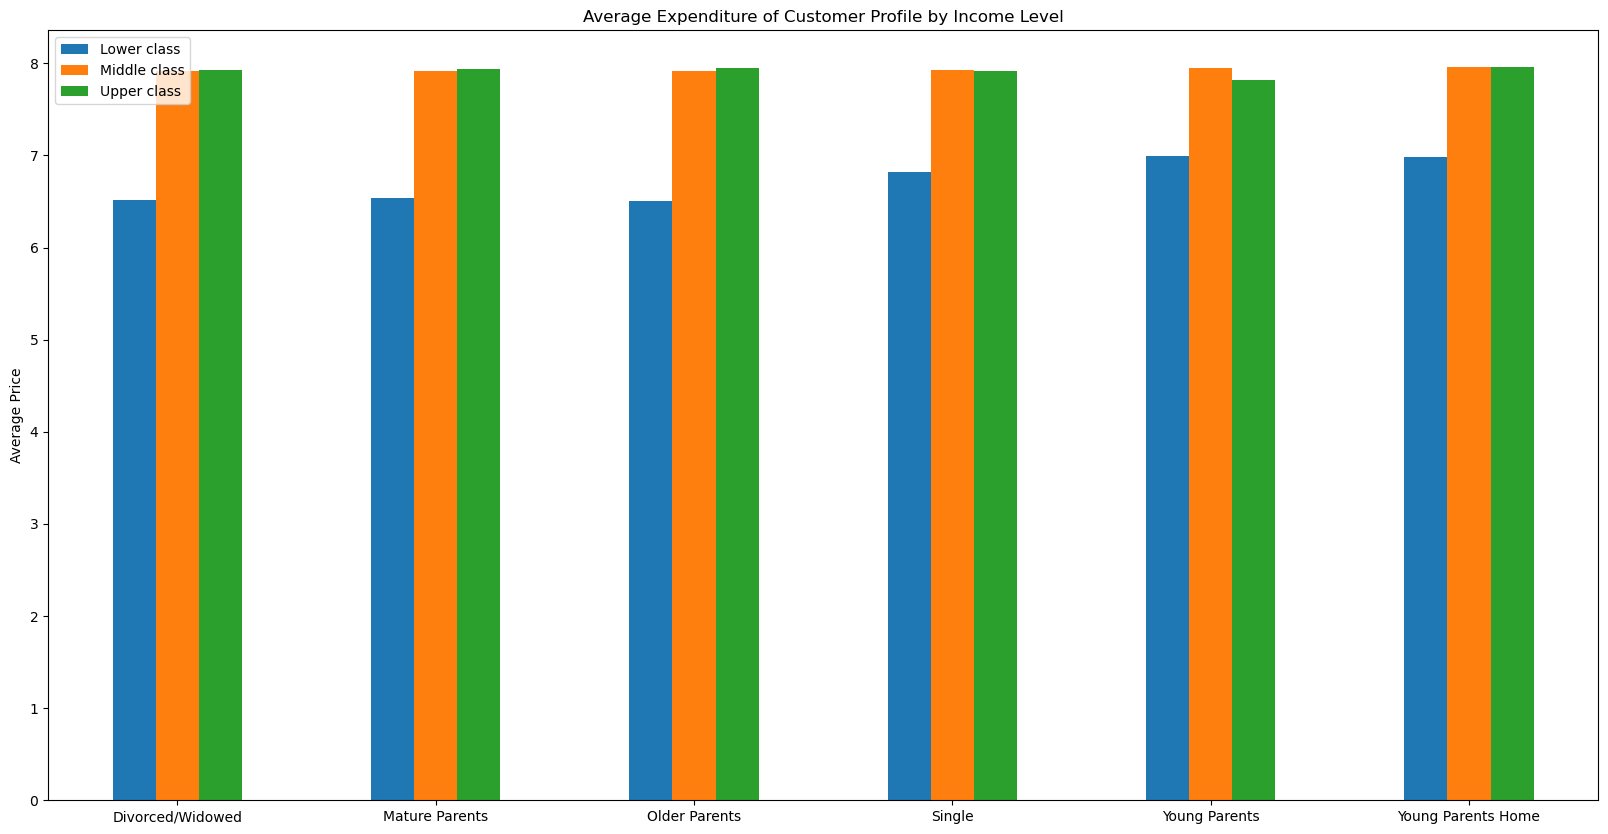

In [78]:
# Plot bar chart on profile and income level

Lower_class = [6.52, 6.54, 6.51, 6.82, 6.99, 6.98]
Middle_class = [7.92, 7.92, 7.92, 7.93, 7.95, 7.96]
Upper_class = [7.93, 7.94, 7.95, 7.92, 7.82, 7.96]
index = ['Divorced/Widowed', 'Mature Parents', 'Older Parents', 'Single', 'Young Parents', 'Young Parents Home']
df = pd.DataFrame({'Lower class': Lower_class,
                   'Middle class': Middle_class,
                   'Upper class': Upper_class}, index=index)
ax2 = df.plot.bar(rot=0, figsize=(20,10))
ax2.set_title("Average Expenditure of Customer Profile by Income Level")
ax2.set_ylabel("Average Price")

In [79]:
ax2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_income.png'))

### From the above bar chart, it seems like the upper class young parents and young parents who are staying with their parents are spending a lot more on average compared to their same cohort at lower and middle class. 

In [67]:
df_upper = df_states4[df_states4['income_flag'] == 'Upper classe'] 

In [68]:
df_upper.shape

(2841646, 9)

In [84]:
# Create group by upper class customer profile and department_id on average expenditure

df_states4.groupby(['profile', 'department_id']).agg({'prices' : ['mean']})

prices
                                       mean
profile            department_id           
Divorced/Widowed   1               7.755216
                   2               7.042892
                   3               7.863604
                   4               8.002391
                   5               8.042499
                   6               7.694201
                   7               7.657924
                   8               7.730143
                   9               7.339615
                   10              8.250411
                   11              8.024705
                   12             16.315690
                   13              8.025950
                   14              8.040541
                   15              7.535295
                   16              8.351703
                   17              7.357390
                   18              7.636209
                   19              4.268954
                   20              7.847583
                   21              8.859044
Mature Parents     1               7.754505
                   2               7.108849
                   3               7.846802
                   4               7.979635
                   5               8.203340
                   6               7.673743
                   7               7.662322
                   8               7.741025
                   9               7.358807
                   10              8.392388
                   11              8.012168
                   12             16.361285
                   13              8.024865
                   14              8.041375
                   15              7.550814
                   16              8.325846
                   17              7.409789
                   18              7.618857
                   19              4.274573
                   20              7.813827
                   21              8.694896
Older Parents      1               7.708315
                   2               6.830153
                   3               7.884721
                   4               7.975233
                   5               8.180323
                   6               7.700959
                   7               7.698083
                   8               7.937366
                   9               7.345876
                   10              8.348514
                   11              8.007193
                   12             16.281908
                   13              8.005527
                   14              8.010975
                   15              7.568234
                   16              8.341388
                   17              7.379781
                   18              7.647628
                   19              4.273777
                   20              7.780362
                   21              8.594062
Single             1               7.730555
                   2               6.886870
                   3               7.818887
                   4               7.983922
                   5               7.969088
                   6               7.651068
                   7               7.682913
                   8               8.063048
                   9               7.347048
                   10              8.325282
                   11              8.021389
                   12             16.238809
                   13              8.009024
                   14              8.051837
                   15              7.524229
                   16              8.340314
                   17              7.362579
                   18              7.574371
                   19              4.276244
                   20              7.780002
                   21              8.677435
Young Parents      1               7.745526
                   2               6.997854
                   3               7.851351
                   4               7.970515
                   5             

In [70]:
# Create group by customer profile and income flag on total expenditure

df_states4.groupby(['profile', 'income_flag']).agg({'prices' : ['sum']})

prices
                                        sum
profile            income_flag             
Divorced/Widowed   Lower class    1460328.2
                   Middle class  16251495.5
                   Upper classe   2920539.8
Mature Parents     Lower class    4395913.1
                   Middle class  44821685.2
                   Upper classe   7590217.1
Older Parents      Lower class    4624980.2
                   Middle class  48514598.8
                   Upper classe   8648195.3
Single             Lower class    4682349.8
                   Middle class  32136073.9
                   Upper classe   2828705.5
Young Parents      Lower class    7684097.8
                   Middle class  42648110.9
                   Upper classe    434413.4
Young Parents Home Lower class    1680911.7
                   Middle class   9764952.8
                   Upper classe    106666.6

Text(0, 0.5, 'Total Price')

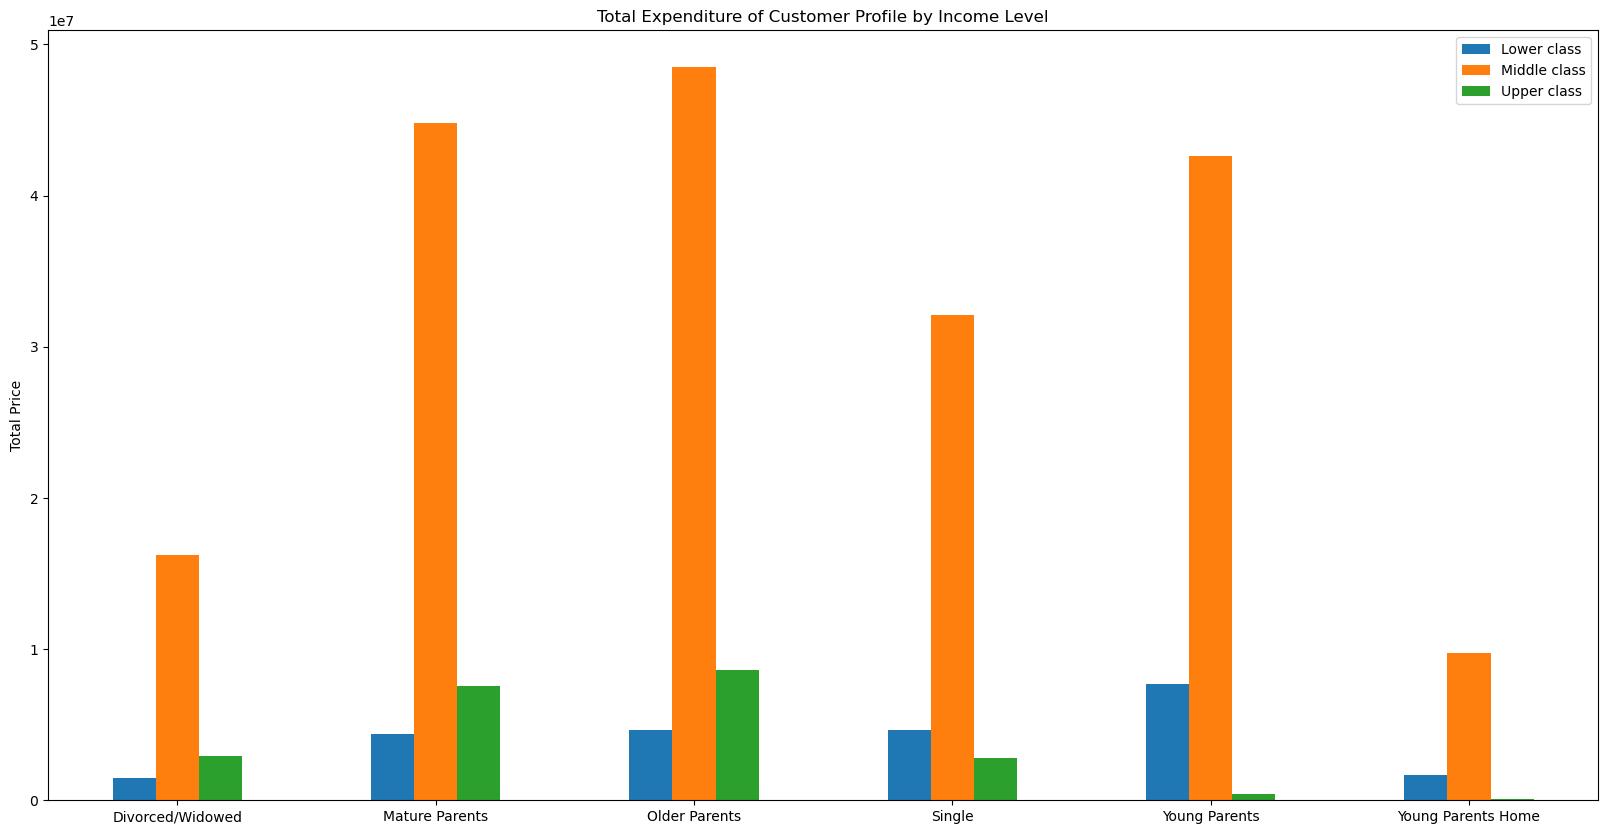

In [82]:
# Plot bar chart on profile and income level for total expenditure

Lower_class = [1460328.2, 4395913.1, 4624980.2, 4682349.8, 7684097.8, 1680911.7]
Middle_class = [16251495.5, 44821685.2, 48514598.8, 32136073.9, 42648110.9, 9764952.8]
Upper_class = [2920539.8, 7590217.1, 8648195.3, 2828705.5, 434413.4, 106666.6]
index = ['Divorced/Widowed', 'Mature Parents', 'Older Parents', 'Single', 'Young Parents', 'Young Parents Home']
df = pd.DataFrame({'Lower class': Lower_class,
                   'Middle class': Middle_class,
                   'Upper class': Upper_class}, index=index)
ax3 = df.plot.bar(rot=0, figsize=(20,10))
ax3.set_title("Total Expenditure of Customer Profile by Income Level")
ax3.set_ylabel("Total Price")

In [83]:
ax3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_income_total.png'))

In [73]:
# Create group by customer profile and income flag on average order

df_states4.groupby(['profile', 'income_flag']).agg({'max_order' : ['mean']})

max_order
                                      mean
profile            income_flag            
Divorced/Widowed   Lower class   32.372354
                   Middle class  34.782251
                   Upper classe  35.733065
Mature Parents     Lower class   31.474037
                   Middle class  34.543823
                   Upper classe  34.149940
Older Parents      Lower class   32.715290
                   Middle class  34.258919
                   Upper classe  35.110538
Single             Lower class   33.622737
                   Middle class  34.697130
                   Upper classe  36.195247
Young Parents      Lower class   32.681119
                   Middle class  34.852402
                   Upper classe  36.735211
Young Parents Home Lower class   30.615172
                   Middle class  35.601997
                   Upper classe  42.326781

Text(0, 0.5, 'Average Order')

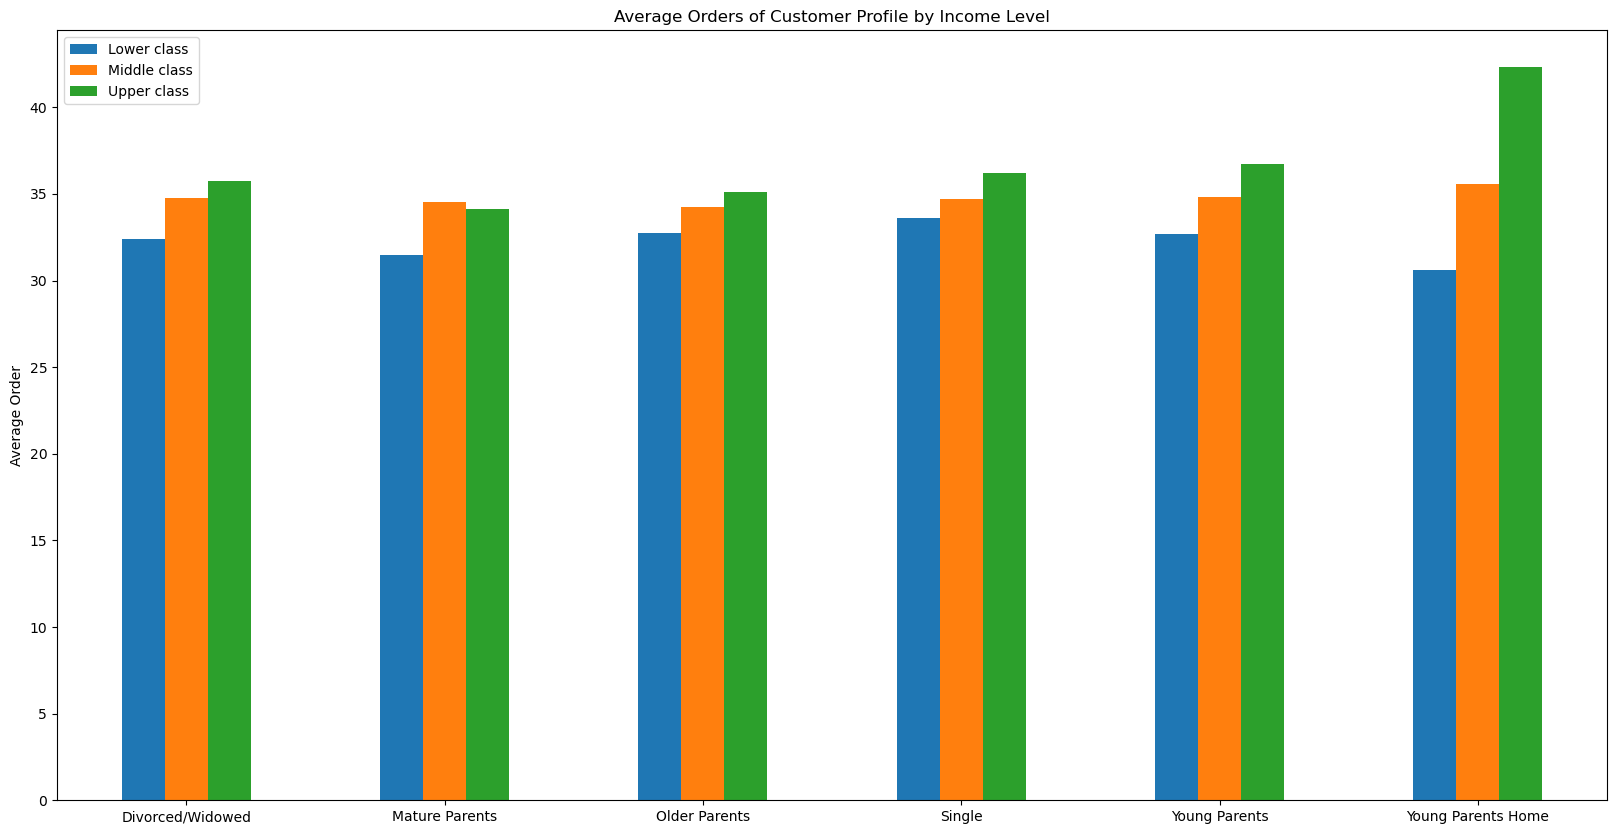

In [74]:
# Plot bar chart on profile and income level for average number of order

Lower_class = [32.37, 31.47, 32.72, 33.62, 32.68, 30.62]
Middle_class = [34.78, 34.54, 34.26, 34.70, 34.85, 35.60]
Upper_class = [35.73, 34.15, 35.11, 36.20, 36.74, 42.33]
index = ['Divorced/Widowed', 'Mature Parents', 'Older Parents', 'Single', 'Young Parents', 'Young Parents Home']
df = pd.DataFrame({'Lower class': Lower_class,
                   'Middle class': Middle_class,
                   'Upper class': Upper_class}, index=index)
ax4 = df.plot.bar(rot=0, figsize=(20,10))
ax4.set_title("Average Orders of Customer Profile by Income Level")
ax4.set_ylabel("Average Order")

In [75]:
ax4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_income_order.png'))

Text(0, 0.5, 'Average Price')

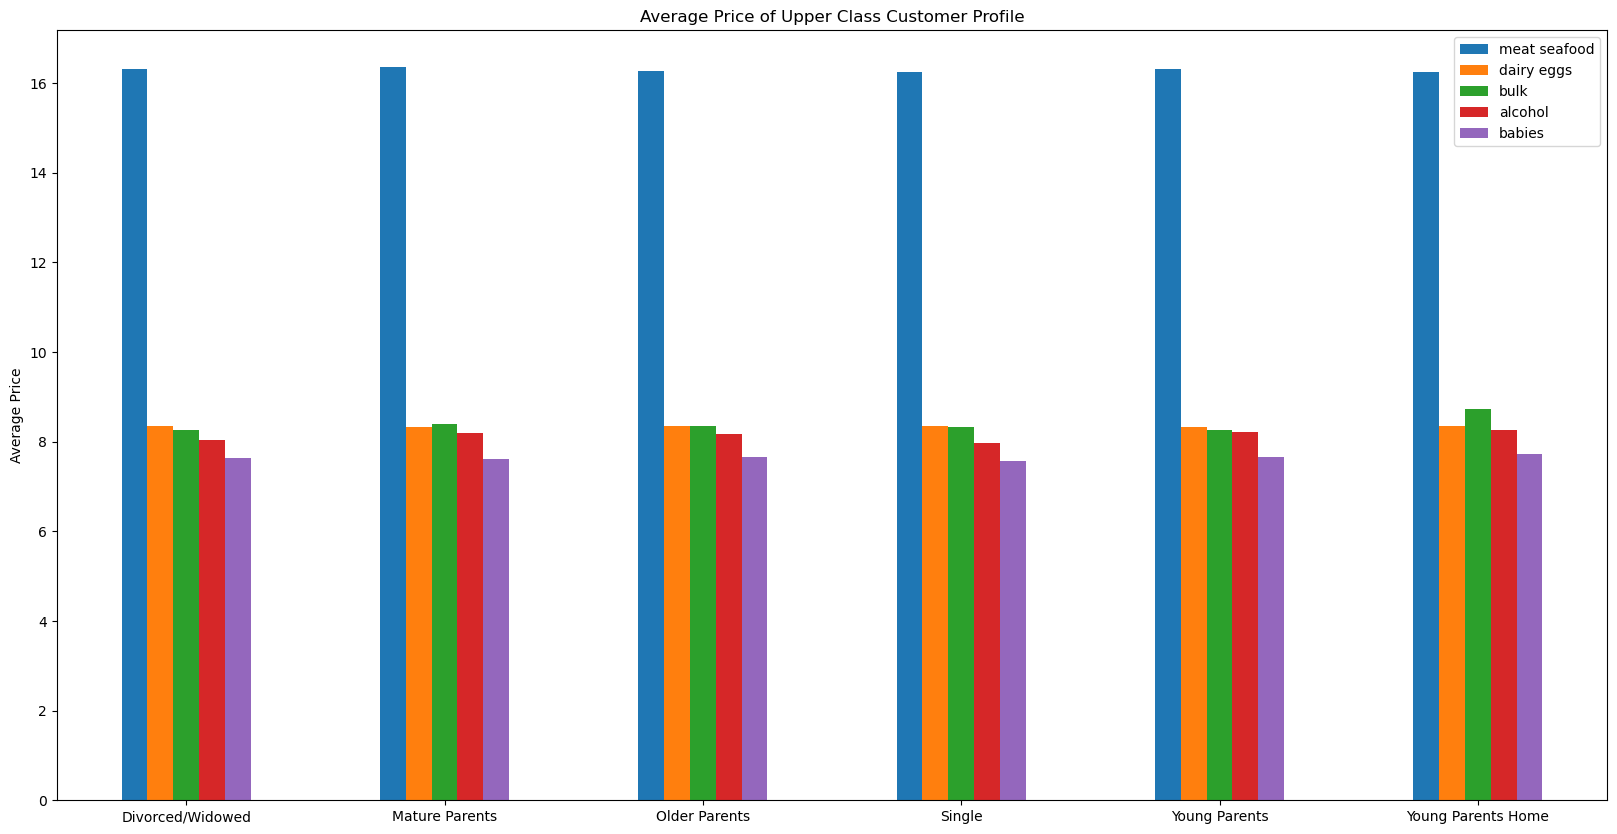

In [85]:
# Plot bar chart on profile and upper class income level for average expenditure on top 4 departments

meat_seafood = [16.32, 16.36, 16.28, 16.24, 16.31, 16.25]
dairy_eggs = [8.35, 8.33, 8.34, 8.34, 8.33, 8.36]
bulk = [8.25, 8.39, 8.35, 8.33, 8.26, 8.73]
alcohol = [8.04, 8.2, 8.18, 7.97, 8.22, 8.25]
babies = [7.64, 7.62, 7.65, 7.57, 7.66, 7.72]
index = ['Divorced/Widowed', 'Mature Parents', 'Older Parents', 'Single', 'Young Parents', 'Young Parents Home']
df = pd.DataFrame({'meat seafood': meat_seafood,
                   'dairy eggs': dairy_eggs,
                   'bulk': bulk,
                   'alcohol': alcohol,
                   'babies': babies}, index=index)
ax5 = df.plot.bar(rot=0, figsize=(20,10))
ax5.set_title("Average Price by Customer Profile")
ax5.set_ylabel("Average Price")

In [86]:
ax5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_upper_dept.png'))

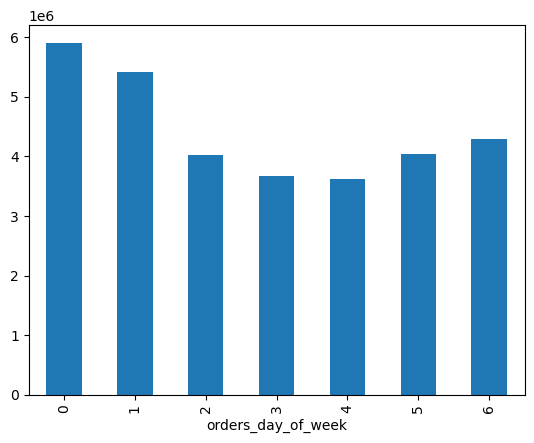

In [89]:
# Creating bar chart for busiet day of week

ax6 = ords_prods_cust_inc['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [90]:
ax6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_of_week.png'))

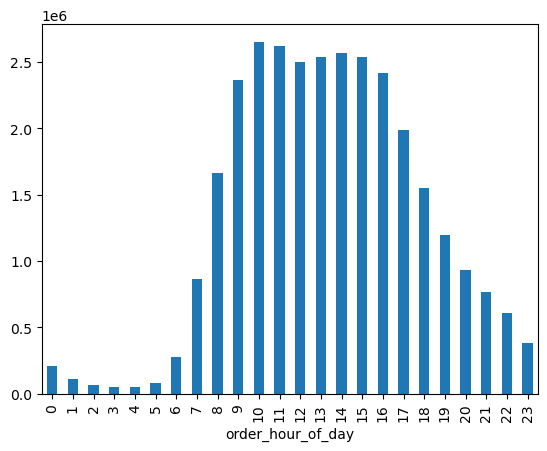

In [92]:
# Creating bar chart for busiet hour of day

ax7 = ords_prods_cust_inc['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [93]:
ax7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_of_day.png'))

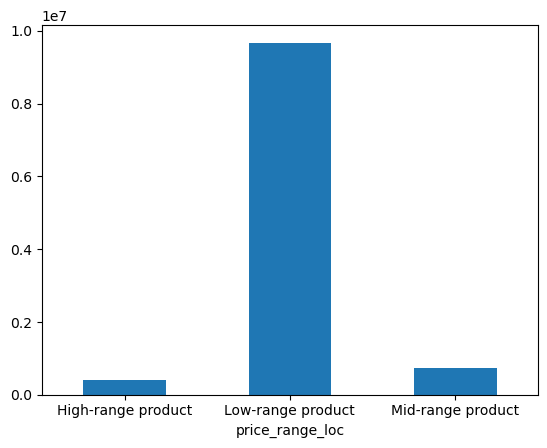

In [96]:
# Creating bar chart for price range

ax8 = ords_prods_cust_inc['price_range_loc'].value_counts().sort_index().plot.bar(rot=0)

In [97]:
ax8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [98]:
ords_prods_cust_inc['price_range_loc'].value_counts(dropna = False)

price_range_loc
NaN                   20164567
Low-range product      9674840
Mid-range product       727204
High-range product      397953
Name: count, dtype: int64

In [99]:
ords_prods_cust_inc['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

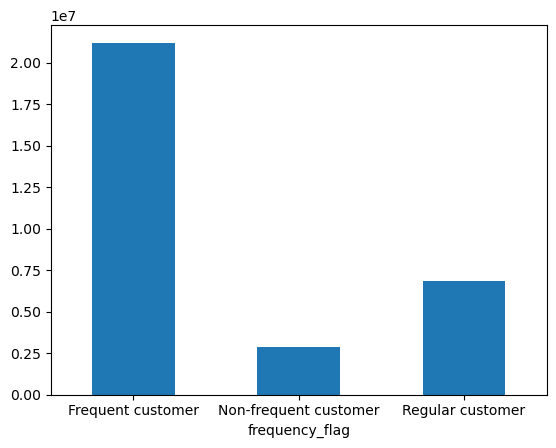

In [102]:
# Creating bar chart for price range

ax9 = ords_prods_cust_inc['frequency_flag'].value_counts().sort_index().plot.bar(rot=0)

In [103]:
ax9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [107]:
# Create group by frequent and loyalty expenditure

ords_prods_cust_inc.groupby(['frequency_flag', 'loyalty_flag']).agg({'max_order' : ['mean']})

max_order
                                             mean
frequency_flag        loyalty_flag               
Frequent customer     Loyal customer    63.990330
                      New customer       7.594343
                      Regular customer  26.743940
Non-frequent customer New customer       7.279446
                      Regular customer  13.302979
Regular customer      Loyal customer    42.338011
                      New customer       7.675239
                      Regular customer  19.178832

In [109]:
# Create group by customer profile and region on average orders

df_states4.groupby(['profile', 'Region']).agg({'max_order' : ['mean']})

max_order
                                   mean
profile            Region              
Divorced/Widowed   Midwest    34.666063
                   Northeast  35.207544
                   South      34.813625
                   West       34.263249
Mature Parents     Midwest    33.789295
                   Northeast  35.114916
                   South      33.609095
                   West       34.730676
Older Parents      Midwest    33.336606
                   Northeast  34.345516
                   South      34.457479
                   West       34.689418
Single             Midwest    34.444122
                   Northeast  33.631403
                   South      34.688920
                   West       35.500883
Young Parents      Midwest    34.125864
                   Northeast  34.421808
                   South      35.019900
                   West       34.218946
Young Parents Home Midwest    33.842070
                   Northeast  36.448099
                   South      35.121939
                   West       34.337605

Text(0, 0.5, 'Average Orders')

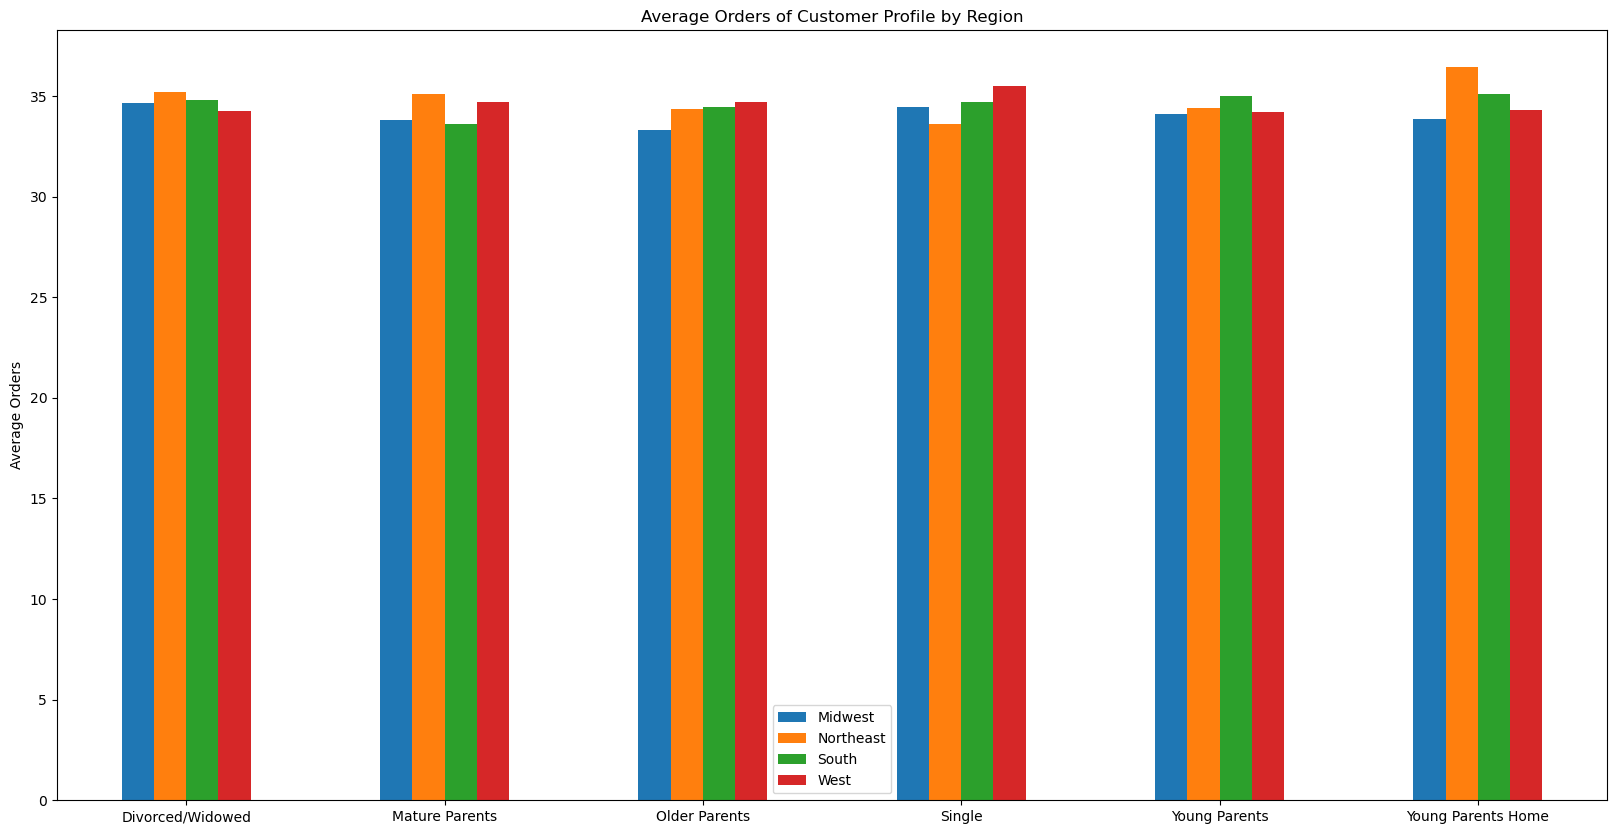

In [110]:
# Plot bar chart on profile and region

Midwest = [34.67, 33.79, 33.34, 34.44, 34.13, 33.84]
Northeast = [35.21, 35.11, 34.35, 33.63, 34.42, 36.45]
South = [34.81, 33.61, 34.46, 34.69, 35.02, 35.12]
West = [34.26, 34.73, 34.69, 35.50, 34.21, 34.33]
index = ['Divorced/Widowed', 'Mature Parents', 'Older Parents', 'Single', 'Young Parents', 'Young Parents Home']
df = pd.DataFrame({'Midwest': Midwest,
                   'Northeast': Northeast,
                   'South': South,
                   'West': West}, index=index)
ax10 = df.plot.bar(rot=0, figsize=(20,10))
ax10.set_title("Average Orders of Customer Profile by Region")
ax10.set_ylabel("Average Orders")

In [111]:
ax10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

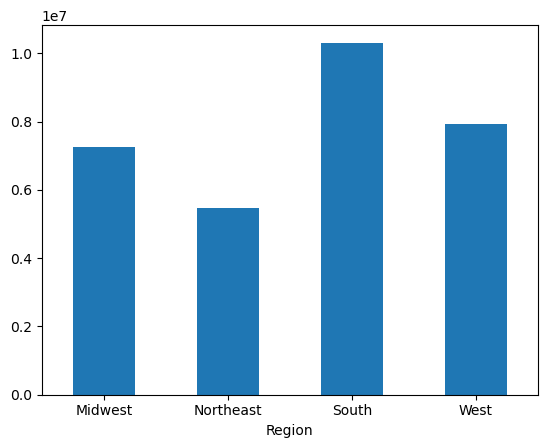

In [113]:
# Creating bar chart for region

ax11 = df_states4['Region'].value_counts().sort_index().plot.bar(rot=0)

In [114]:
ax11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))